# Random Forest Classifier with Balanced Weights

## Standardised Features

Using  Random Forest Classifier to handle imbalanced data and to feature select

Pre-requisite: nommesen_april-week2-prepare_data.ipynb

In [1]:
import pandas as pd
import numpy as np
import math

# SKLearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

import joblib


## Loading the standardised data sets

In [2]:
df_standard = np.load('../data/processed/df_standard.npy')
target_var = np.load('../data/processed/target_var.npy')

print("Standardised samples:")
print("Dimension of features training data", df_standard.shape)
print("Dimension of target training data", target_var.shape)

Standardised samples:
Dimension of features training data (8000, 20)
Dimension of target training data (8000,)


In [3]:
X_ftrain = pd.DataFrame(df_standard, 
             columns=['ID',
                 'Games Played', 
    'Minutes Played',
    'Points Per Game',
    'Field Goals Made',
    'Field Goals Attempts',
    'Field Goals Percent',
    '3Points Made',
    '3Points Attempts',
    '3Points Percent',
    'Free Throw Made',
    'Free Throw Attempts',
    'Free Throw Percent',
    'Offensive Rebounds',
    'Defensive Rebounds',
    'Rebounds',
    'Assists',
    'Steals',
    'Blocks',
    'Turnovers'])

X_ftrain.head()

,ID,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,-1.731834,1.006100,0.640574,0.123403,0.113959,0.047090,0.177269,-0.428374,-0.486911,0.188493,0.655953,0.760387,0.070392,1.428377,-0.121037,0.266040,1.161949,1.107242,-0.055071,0.473210
1,-1.731401,0.714005,0.360766,0.748626,0.822648,0.465578,1.704465,-1.469853,-1.712288,0.957140,1.087875,1.319370,-0.341888,3.210407,1.100107,1.608950,-0.681844,-0.364787,0.432148,0.196671
2,-1.730968,1.298195,0.058574,-0.640758,-0.535673,-0.482994,-0.293888,0.352736,0.361427,0.919645,-1.071732,-1.076272,0.415557,-0.608229,-0.264701,-0.405415,-0.608092,-0.610125,-0.055071,-0.909485
3,-1.730535,0.012976,0.058574,0.216029,0.409246,0.130788,1.282049,0.092366,-0.015612,0.257234,-0.531830,-0.357579,-0.428180,-0.353653,-0.121037,-0.117649,0.129425,-0.610125,-0.176876,0.888019
4,-1.730102,0.012976,-0.086926,-0.826009,-0.653788,-0.789885,1.005854,0.613106,0.549947,-0.367682,-1.287692,-1.156127,-1.665021,1.682952,0.381787,0.793612,-0.903099,-0.610125,0.432148,-0.771215


In [4]:
y_ftrain = pd.DataFrame(target_var, 
             columns=['TARGET_5Yrs'])

y_ftrain.head()

,TARGET_5Yrs
0,1
1,1
2,1
3,1
4,1


In [5]:
remove_id = X_ftrain.pop('ID')

## Splitting data
Split randomly the dataset with random_state=8 into 2 different sets: training data (80%) and validation data (20%)

In [6]:
X_train, X_val, y_train, y_val = train_test_split (X_ftrain, 
                                                   y_ftrain,
                                                   test_size=0.2,
                                                   random_state=8
                                                  )

print("Dimension of features training data", X_train.shape)
print("Dimension of target training data", y_train.shape)
print("Dimension of features validation data", X_val.shape)
print("Dimension of targer validation data", y_val.shape)

Dimension of features training data (6400, 19)
Dimension of target training data (6400, 1)
Dimension of features validation data (1600, 19)
Dimension of targer validation data (1600, 1)


In [7]:
X_train

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers
3617,0.071395,-0.523427,-0.687070,-0.771903,-0.734087,-0.261394,-1.209483,-0.863950,-0.480167,0.008072,-0.038161,-0.207657,-0.608229,-0.336533,-0.501337,-0.755595,-0.610125,-0.176876,-0.771215
1120,1.064519,0.248843,0.077091,-0.063214,-0.008708,0.031048,0.352736,0.267168,-0.467668,0.439993,0.121549,0.731958,0.791937,1.315603,1.129339,-0.681844,-0.119449,-0.176876,0.058402
3873,-0.746471,-1.452389,-1.358606,-1.362477,-1.319970,-1.333681,-0.688743,-0.298391,-1.417540,-1.287692,-1.395691,-0.265185,-1.244669,-1.414013,-1.364637,-0.091830,-0.610125,-0.664095,-1.324294
153,0.538748,0.080958,-0.524976,-0.476616,-0.343498,-0.683810,-0.428374,-0.298391,0.357221,-0.531830,-0.277725,-2.201944,-0.480941,-0.121037,-0.165610,-0.386837,-0.364787,-0.055071,-0.494676
2960,-1.038567,0.125727,-0.270255,-0.181328,-0.092406,-0.407615,-0.428374,-0.392651,-1.392544,-0.315869,-0.197870,-0.897987,-0.099078,-0.480197,-0.309493,-0.091830,-0.610125,0.066734,0.749749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,0.655586,3.114075,2.647450,2.712485,2.809109,0.112281,1.394215,1.398285,1.413328,1.843737,2.038062,-0.322712,1.046513,2.895908,2.472250,1.309452,1.843256,0.066734,2.408983
2409,-0.220700,-0.422696,-0.895478,-1.067190,-0.845683,-1.772344,0.613106,0.832726,-0.330187,-0.099909,0.041694,-1.444499,-0.480941,-0.695693,-0.549298,-0.091830,0.616566,-0.176876,-0.771215
2033,-0.454376,-0.333157,-0.918634,-1.008132,-1.068877,-0.033940,0.873476,0.926986,0.775914,-0.747791,-0.756853,0.127920,0.028210,0.094459,0.026235,-0.460589,-0.364787,0.066734,-0.632946
1364,1.648710,3.281959,1.119128,0.822648,0.939864,0.226009,0.352736,0.455687,-1.261311,1.951717,2.117917,-0.476119,2.446680,3.111404,3.143705,1.899466,0.616566,0.432148,0.473210


## Model Development

0.678	RandomForestClassifier(n_estimators=2000, class_weight = 'balanced')!

In [8]:
df_y_train = pd.DataFrame(y_train, 
             columns=['TARGET_5Yrs'])
df_y_train['TARGET_5Yrs'].value_counts()

1    5326
0    1074
Name: TARGET_5Yrs, dtype: int64

In [10]:
# instantiate the model (using the "balanced" mode)
randomforest2_train=RandomForestClassifier(n_estimators=2000,
                                           class_weight = 'balanced',
                                           criterion = 'log_loss',
                                           random_state=7,
                                           max_depth=7
                                          )

# fit the model with data
randomforest2_train.fit(X_train, y_train)


/tmp/ipykernel_5267/3916520673.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest2_train.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=7, n_estimators=2000, random_state=7)

In [11]:
# save the model to disk
my_model_filename = '../models/randomforest2.sav'
joblib.dump(randomforest2_train, my_model_filename)

['../models/randomforest2.sav']

## Model Evaluation

In [12]:
# Load the model from the file 
randomforest2_from_joblib = joblib.load('../models/randomforest2.sav') 

In [13]:
# Predict on training set
y_pred_ontrain = randomforest2_from_joblib.predict(X_train)

# Accuracy
print( accuracy_score(y_pred_ontrain, y_train) )

0.75046875


### Prediction on validation data

In [14]:
y_pred_onval = randomforest2_from_joblib.predict(X_val)
y_pred_onval

array([0, 0, 1, ..., 1, 0, 1])

### Confusion Matrix

In [15]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred_onval)
cnf_matrix


array([[142, 115],
       [381, 962]])

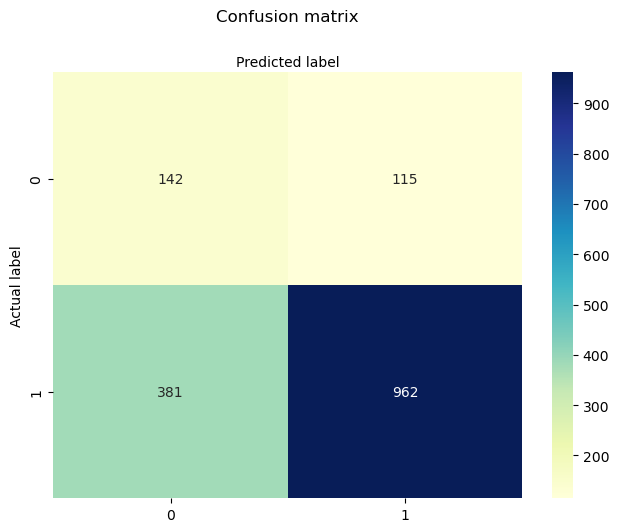

In [16]:
class_names = [0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

### Accuracy, Precision, and Recall

In [17]:
target_names = ['career years played < 5', 'career years played >= 5']
print(classification_report(y_val, y_pred_onval, target_names=target_names))

                          precision    recall  f1-score   support

 career years played < 5       0.27      0.55      0.36       257
career years played >= 5       0.89      0.72      0.80      1343

                accuracy                           0.69      1600
               macro avg       0.58      0.63      0.58      1600
            weighted avg       0.79      0.69      0.73      1600



### ROC

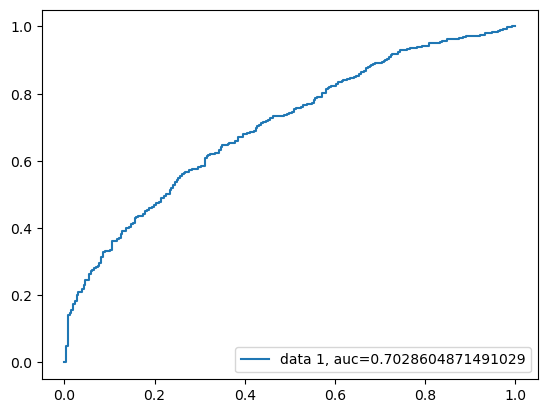

In [18]:
# y_pred_proba = logreg.predict_proba(X_test)[::,1]
y_proba_onval = randomforest2_from_joblib.predict_proba(X_val)[::,1]  # official
fpr, tpr, _ = metrics.roc_curve(y_val,  y_proba_onval)
auc = metrics.roc_auc_score(y_val, y_proba_onval)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Test on unseen data

### Loading the test data set

In [19]:
test = np.load('../data/processed/test.npy')

print("Dimension of training data - unsplit", test.shape)

df_test = pd.DataFrame(test, 
             columns=['ID',
                 'Games Played', 
    'Minutes Played',
    'Points Per Game',
    'Field Goals Made',
    'Field Goals Attempts',
    'Field Goals Percent',
    '3Points Made',
    '3Points Attempts',
    '3Points Percent',
    'Free Throw Made',
    'Free Throw Attempts',
    'Free Throw Percent',
    'Offensive Rebounds',
    'Defensive Rebounds',
    'Rebounds',
    'Assists',
    'Steals',
    'Blocks',
    'Turnovers'
                     ])

df_test['ID'] = df_test['ID'].astype(int)
df_test['ID'] = df_test['ID'].astype(str)

# df_test_indexed=df_test.set_index('ID')

df_test.head()

Dimension of training data - unsplit (3799, 20)


,ID,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,0,56.0,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,1,43.0,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,0.0,1.8
2,2,82.0,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,3,86.0,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,4,58.0,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    3799 non-null   object 
 1   Games Played          3799 non-null   float64
 2   Minutes Played        3799 non-null   float64
 3   Points Per Game       3799 non-null   float64
 4   Field Goals Made      3799 non-null   float64
 5   Field Goals Attempts  3799 non-null   float64
 6   Field Goals Percent   3799 non-null   float64
 7   3Points Made          3799 non-null   float64
 8   3Points Attempts      3799 non-null   float64
 9   3Points Percent       3799 non-null   float64
 10  Free Throw Made       3799 non-null   float64
 11  Free Throw Attempts   3799 non-null   float64
 12  Free Throw Percent    3799 non-null   float64
 13  Offensive Rebounds    3799 non-null   float64
 14  Defensive Rebounds    3799 non-null   float64
 15  Rebounds             

In [21]:
df_features_test = df_test[['Games Played', 
    'Minutes Played',
    'Points Per Game',
    'Field Goals Made',
    'Field Goals Attempts',
    'Field Goals Percent',
    '3Points Made',
    '3Points Attempts',
    '3Points Percent',
    'Free Throw Made',
    'Free Throw Attempts',
    'Free Throw Percent',
    'Offensive Rebounds',
    'Defensive Rebounds',
    'Rebounds',
    'Assists',
    'Steals',
    'Blocks',
    'Turnovers']]

df_features_test.head()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,56.0,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,43.0,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,0.0,1.8
2,82.0,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,86.0,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,58.0,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9


### Predictions

In [22]:
# Use the loaded model to make predictions 
y_pred_ontest = randomforest2_from_joblib.predict(df_features_test)

df_test_predictions = pd.DataFrame(y_pred_ontest, columns=['TARGET_5Yrs'])

df_test_predictions.TARGET_5Yrs.value_counts()

1    3799
Name: TARGET_5Yrs, dtype: int64

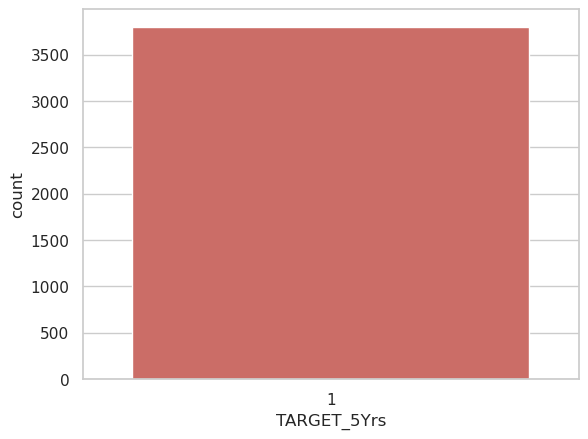

<Figure size 640x480 with 0 Axes>

In [23]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x = 'TARGET_5Yrs',
              data = df_test_predictions,
              palette = 'hls'
             )
plt.show()
plt.savefig('count_plot')

### Submit Prediction to Kaggle

In [24]:
# Use the loaded model to make predictions 
y_test = randomforest2_from_joblib.predict_proba(df_features_test)

In [25]:
y_test

array([[0.14427851, 0.85572149],
       [0.09698493, 0.90301507],
       [0.08106787, 0.91893213],
       ...,
       [0.13453859, 0.86546141],
       [0.06538687, 0.93461313],
       [0.15296897, 0.84703103]])

In [26]:
df_test_probabilites = pd.DataFrame(y_test, 
             columns=['TARGET_5Yrs_0',
                 'TARGET_5Yrs'
                     ])

In [27]:
df_test_probabilites.head()

,TARGET_5Yrs_0,TARGET_5Yrs
0,0.144279,0.855721
1,0.096985,0.903015
2,0.081068,0.918932
3,0.055046,0.944954
4,0.121113,0.878887


In [28]:
output = df_test.join(df_test_probabilites)
output=output.set_index('ID')

output

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,Free Throw Made,...,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs_0,TARGET_5Yrs
ID,,,,,,,,,,,,,,,,,,,,,
0,56.0,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,...,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8,0.144279,0.855721
1,43.0,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,...,75.3,0.5,0.9,1.5,3.5,0.6,0.0,1.8,0.096985,0.903015
2,82.0,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,...,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0,0.081068,0.918932
3,86.0,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,...,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6,0.055046,0.944954
4,58.0,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,...,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9,0.121113,0.878887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,84.0,21.2,8.7,3.4,6.7,50.2,0.0,0.0,-4.5,1.7,...,68.1,1.9,2.3,3.9,1.5,0.6,0.3,2.0,0.091169,0.908831
3795,49.0,16.3,6.4,2.9,6.6,44.4,-0.1,-0.4,19.8,1.0,...,50.2,1.7,2.8,4.4,0.4,0.4,0.4,0.7,0.105644,0.894356
3796,53.0,9.9,2.1,0.8,1.8,43.1,-0.4,-0.6,1.9,0.6,...,63.9,0.7,1.0,1.7,0.4,0.4,0.2,0.5,0.134539,0.865461


In [29]:
output['TARGET_5Yrs'].to_csv('../models/nommesen_april_week3_model-randomforest2.csv')